回归模型试图预测连续空间中的目标。回归计分可视化工具显示模型空间中的实例，以便更好地理解模型是如何进行预测的。我们目前已经实施了三种回归评估：

+ 残差图Residuals Plot：绘制期望值与实际值之间的差
+ 预测误差图Prediction Error Plot：在模型空间中绘制期望值与实际值
+ alpha选择：视觉调整正则化超参数
+ 库克距离Cook’s Distance：描述了单个样本对整个回归模型的影响程度


Estimator score Visualizer包装Scikit Learn estimators并公开Estimator API，以便它们具有fit（）、predict（）和score（）方法，这些方法在幕后调用适当的估计器方法。Score可视化工具可以包装一个估计器，并作为管道或VisualPipeline中的最后一步传入。
本文如果数据集下载不下来，查看下面地址，然后放入yellowbrick安装目录\datasets\fixtures文件夹:

```
{
  "bikeshare": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/bikeshare.zip",
    "signature": "4ed07a929ccbe0171309129e6adda1c4390190385dd6001ba9eecc795a21eef2"
  },
  "hobbies": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/hobbies.zip",
    "signature": "6114e32f46baddf049a18fb05bad3efa98f4e6a0fe87066c94071541cb1e906f"
  },
  "concrete": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/concrete.zip",
    "signature": "5807af2f04e14e407f61e66a4f3daf910361a99bb5052809096b47d3cccdfc0a"
  },
  "credit": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/credit.zip",
    "signature": "2c6f5821c4039d70e901cc079d1404f6f49c3d6815871231c40348a69ae26573"
  },
  "energy": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/energy.zip",
    "signature": "174eca3cd81e888fc416c006de77dbe5f89d643b20319902a0362e2f1972a34e"
  },
  "game": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/game.zip",
    "signature": "ce799d1c55fcf1985a02def4d85672ac86c022f8f7afefbe42b20364fba47d7a"
  },
  "mushroom": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/mushroom.zip",
    "signature": "f79fdbc33b012dabd06a8f3cb3007d244b6aab22d41358b9aeda74417c91f300"
  },
  "occupancy": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/occupancy.zip",
    "signature": "0b390387584586a05f45c7da610fdaaf8922c5954834f323ae349137394e6253"
  },
  "spam": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/spam.zip",
    "signature": "000309ac2b61090a3001de3e262a5f5319708bb42791c62d15a08a2f9f7cb30a"
  },
  "walking": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/walking.zip",
    "signature": "7a36615978bc3bb74a2e9d5de216815621bd37f6a42c65d3fc28b242b4d6e040"
  },
  "nfl": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/nfl.zip",
    "signature": "4989c66818ea18217ee0fe3a59932b963bd65869928c14075a5c50366cb81e1f"
  }
}
```

# 1 残差图Residuals Plot
在回归模型的上下文中，残差是目标变量的观测值（y）与预测值（ŷ）之间的差，即预测的误差。残差图显示了垂直轴上的残差与水平轴上的因变量之间的差异，使您可以检测目标中可能会或多或少地产生误差的区域。


|可视化器|ResidualsPlot|
|-|-|
|快速使用方法|residuals_plot()|
|模型|回归|
|工作流程|模型评估|

In [11]:
# 多行输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 1.1 基础使用

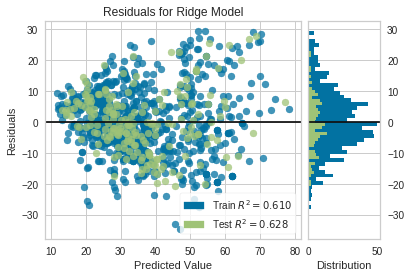

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

# Load a regression dataset
X, y = load_concrete()

# Create the train and test data
# 数据分离
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
# 初始化模型
model = Ridge()
# 残差可视化
visualizer = ResidualsPlot(model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)  
# Evaluate the model on the test data
# 评价模型
visualizer.score(X_test, y_test)  
# Finalize and render the figure
visualizer.show();                 

残差图的常见用途是分析回归器的误差方差。如果这些点围绕水平轴随机分散，则通常适用于数据的线性回归模型；否则，非线性模型更为合适。在上述情况下，我们在二维图中看到相对于目标的残差相当随机，均匀的分布。这似乎表明我们的线性模型运行良好。从直方图中我们还可以看到，我们的误差通常在零附近分布，这通常也表明模型拟合良好。

请注意，如果不需要直方图，则可以使用hist=False标志将其关闭：



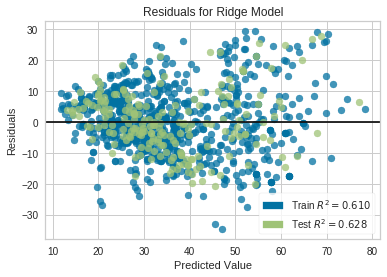

In [13]:
visualizer = ResidualsPlot(model, hist=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

## 1.2 快速方法
使用关联的快速方法，可以在一行中实现与上述类似的功能residuals_plot。此方法将实例化ResidualsPlot可视化程序并将其适合于训练数据，然后将其在可选提供的测试数据（或未提供的训练数据）上评分

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


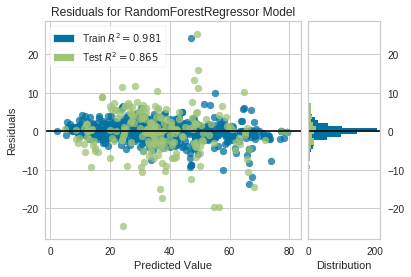

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split as tts
from yellowbrick.regressor import residuals_plot
from yellowbrick.datasets import load_concrete

# Load the dataset and split into train/test splits
X, y = load_concrete()

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, shuffle=True)

# Create the visualizer, fit, score, and show it
viz = residuals_plot(RandomForestRegressor(), X_train, y_train, X_test, y_test);

预测误差图显示了数据集的实际目标与我们的模型生成的预测值之间的关系。这使我们可以看到模型中有多少方差。数据科学家可以通过与预测完全匹配模型的45度线进行比较，使用此图来诊断回归模型。


|可视化器|PredictionError|
|-|-|
|快速使用方法|prediction_error()|
|模型|回归|
|工作流程|模型评估|

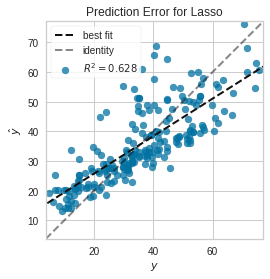

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError

# Load a regression dataset
X, y = load_concrete()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Lasso()
visualizer = PredictionError(model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)  
# Evaluate the model on the test data
visualizer.score(X_test, y_test)  
# Finalize and render the figure
visualizer.show();                 

## 2.2 快速方法
使用关联的快速方法可以实现相同的功能prediction_error。此方法将PredictionError使用关联的参数构建对象，将其拟合，然后（可选）立即显示可视化效果。

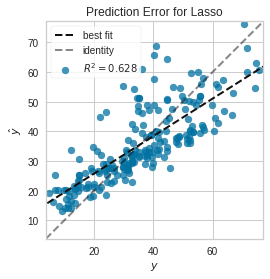

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import prediction_error

# Load a regression dataset
X, y = load_concrete()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Lasso()
visualizer = prediction_error(model, X_train, y_train, X_test, y_test);

# 3 alpha选择
正则化设计用来惩罚模型的复杂性，因此alpha越高，模型的复杂性就越低，从而减少了因方差（过拟合）引起的误差。另一方面，过高的Alpha会由于偏差（欠拟合）而增加误差。因此，重要的是选择一个最佳的alpha，以使两个方向的误差最小。

AlphaSelection可视化工具演示了在线性模型正则化过程中，alpha的不同值是如何影响模型选择的。一般来说，正则化对α的影响更大。


|可视化器|AlphaSelection|
|-|-|
|快速使用方法|alphas()|
|模型|回归|
|工作流程|模型选择，超参数调整|


## 3.1 基本使用

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


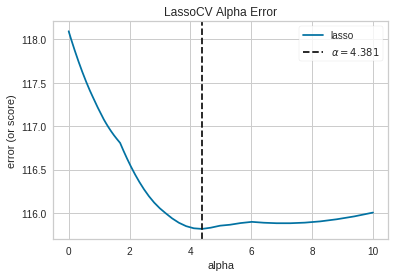

In [17]:
import numpy as np

from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection
from yellowbrick.datasets import load_concrete

# Load the regression dataset
# 加载数据集
X, y = load_concrete()

# Create a list of alphas to cross-validate against
# 创建不同的alphas值
alphas = np.logspace(-10, 1, 400)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X, y)
visualizer.show();

## 3.2 快速方法
上面的相同功能可以通过关联的快速方法alpha来实现。此方法将AlphaSelection使用关联的参数构建Visualizer对象，将其拟合，然后（可选）立即显示它。

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


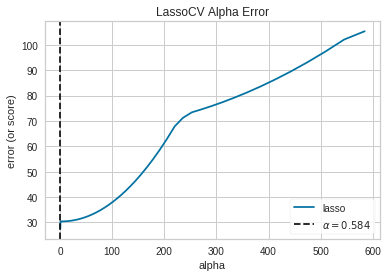

In [18]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor.alphas import alphas

from yellowbrick.datasets import load_energy

# Load dataset
X, y = load_energy()

# Use the quick method and immediately show the figure
alphas(LassoCV(random_state=0), X, y);

# 4 库克距离Cook’s Distance
库克距离是对观察值或实例对线性回归的影响的度量。影响较大的实例可能是异常值，而具有大量高度影响点的数据集可能不是适合线性模型的良好预测指标。该CooksDistance可视化显示了索引的所有实例的干情节及其关联的距离分值，用启发式的阈值一起迅速显示该数据集的百分之多少可以影响OLS回归模型。库克距离具体介绍见：
[http://sofasofa.io/forum_main_post.php?postid=1000622](http://sofasofa.io/forum_main_post.php?postid=1000622)


|可视化器|CooksDistance|
|-|-|
|快速使用方法|cooks_distance()|
|模型|通用线性模型|
|工作流程|数据集/灵敏度分析|


## 4.1 基本使用

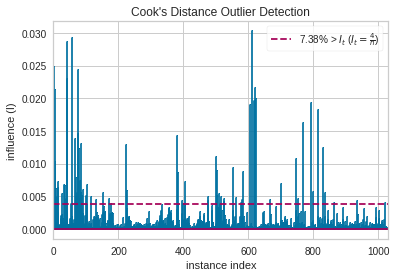

In [19]:
from yellowbrick.regressor import CooksDistance
from yellowbrick.datasets import load_concrete

# Load the regression dataset
X, y = load_concrete()

# Instantiate and fit the visualizer
visualizer = CooksDistance()
visualizer.fit(X, y)
visualizer.show();

## 4.2 快速方法
使用关联的快速方法，可以在一行中实现与上述类似的功能class_prediction_error。此方法将实例化ClassPredictionError可视化程序并将其适合于训练数据，然后将其在可选提供的测试数据（或未提供的训练数据）上评分。

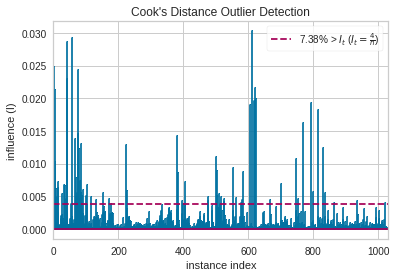

In [20]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import cooks_distance

# Load the regression dataset
X, y = load_concrete()

# Instantiate and fit the visualizer
cooks_distance(
    X, y,
    draw_threshold=True,
    linefmt="C0-", markerfmt=","
);

# 5 参考
[https://www.scikit-yb.org/en/latest/api/regressor/residuals.html](https://www.scikit-yb.org/en/latest/api/regressor/residuals.html)

[https://www.scikit-yb.org/en/latest/api/regressor/peplot.html](https://www.scikit-yb.org/en/latest/api/regressor/peplot.html)

[https://www.scikit-yb.org/en/latest/api/regressor/alphas.html](https://www.scikit-yb.org/en/latest/api/regressor/alphas.html)

[https://www.scikit-yb.org/en/latest/api/regressor/influence.html](https://www.scikit-yb.org/en/latest/api/regressor/influence.html)